In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
class KMeans:
    """
    Algoritmo de clustering K-Means

    Parametros:
        k (int): Número de clusters a encontrar (por defecto 3)
        max_iter (int): Número maximo de iteraciones (por defecto 100)
        centroids (numpy.ndarray): Cordenadas iniciales del centroides (por defecto ninguna)
    """
    def __init__(self, k=3, max_iter=100):
        """
        Constructor de objetos kMeans

        Parametros:
            k (int): Número de cluster
            max_iter (int): Número maximo de iteraciones
        """
        self.k = k
        self.max_iter = max_iter
        self.centroids = None

    def distancia_euclideana(self, p1, p2):
        """
        Calcula la distancia Euclideana entre dos puntos.

        Parametros:
            point1 (numpy.ndarray): Primer punto
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: La distancia euclideana entre los dos puntos
        """
        return np.sqrt(np.sum((p1 - p2)**2))

    def distancia_manhattan(self, point1, point2):
        """
        Calcula la distancia de Manhattan entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto

        Returns:
            float: Distancia de Manhattan entre dos puntos
        """
        return np.sum(np.abs(point1 - point2))

    def distancia_mahalanobis(self, point1, point2, covariance_matrix):
        """
        Cacula la distancia de Mahalanobis entre dos puntos

        Parametros:
            point1 (numpy.ndarray): Primer punto.
            point2 (numpy.ndarray): Segundo punto.
            covariance_matrix (numpy.ndarray): Matrix de covarancia de los datos.

        Returns:
            float: La distancia de Mahalanobis entre dos puntos
        """
        diff = point1 - point2
        return np.sqrt(diff @ np.linalg.inv(covariance_matrix) @ diff.T)

    def calcular_centroides(self, points, labels):
        """
        Calcula los centroides de la nube de puntos dada por la asignación en la variable labels

        Parametros:
            points (numpy.ndarray): Nube de puntos
            labels (numpy.ndarray): Cluster asignado para cada punto

        Returns:
            numpy.ndarray: Centroides de cada cluster
        """

        centroids = np.zeros((self.k, points.shape[1]))
        for i in range(self.k):
            cluster_points = points[labels == i]
            if len(cluster_points) > 0:
              centroids[i] = np.mean(cluster_points, axis=0)
        return centroids

    def run(self, points, tipo_distance='euclidean'):
        """
        Ejecuta un algoritmo K-Means dado la nube de puntos recibida como parametro

        Parametros:
            points (numpy.ndarray): Nube de puntos
            tipo_distance (str): Tipo de distancia a utilizar ('euclidean', 'manhattan', or 'mahalanobis'). Por defecto  'euclidean'.

        Returns:
            numpy.ndarray: El cluster asignado a cada grupo
        """

        indices = np.random.choice(points.shape[0], self.k, replace=False)
        self.centroids = points[indices]

        for _ in range(self.max_iter):
            labels = np.zeros(points.shape[0], dtype=int)
            for i, point in enumerate(points):
                if tipo_distance == 'euclidean':
                    distances = [self.distancia_euclideana(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'manhattan':
                    distances = [self.distancia_manhattan(point, centroid) for centroid in self.centroids]
                elif tipo_distance == 'mahalanobis':
                    covariance_matrix = np.cov(points, rowvar=False)
                    distances = [self.distancia_mahalanobis(point, centroid, covariance_matrix) for centroid in self.centroids]
                else:
                    raise ValueError("Tipo de distancia no disponible")
                labels[i] = np.argmin(distances)

            new_centroids = self.calcular_centroides(points, labels)

            if np.array_equal(self.centroids, new_centroids):
                break

            self.centroids = new_centroids
        return labels

In [4]:
def dibujar2D (points, centroids, labels):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.scatter(points[:, 0], points[:, 1], c='blue', label='Puntos')
    plt.title('Antes de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', label='Puntos')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=200, label='Centroides finales')
    plt.title('Despues de kmeans')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()

    plt.tight_layout()
    plt.show()

def dibujar3D (points, centroids, labels):
    fig = plt.figure(figsize=(10, 5))
    ax1 = fig.add_subplot(121, projection='3d')
    ax1.scatter(points[:, 0], points[:, 1], points[:, 2], c='blue', label='Puntos')
    ax1.set_title('Antes de kmeans')
    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.legend()


    # Plot the points and final centroids
    ax2 = fig.add_subplot(122, projection='3d')
    ax2.scatter(points[:, 0], points[:, 1], points[:, 2], c=labels, cmap='viridis', label='Puntos')
    ax2.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], c='red', marker='*', s=200, label='Centroides finales')
    ax2.set_title('Despues de kmeans')
    ax2.set_xlabel('X')
    ax2.set_ylabel('Y')
    ax2.set_zlabel('Z')
    ax2.legend()

    plt.tight_layout()
    plt.show()

**1: 10 ITERACIONES 2D**

In [9]:
points = np.random.rand(1000, 2) * 10  # Muestras entre 0 y 10 en ambas dimensiones
kmeans = KMeans(k=3, max_iter=10)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)#

[1 0 1 2 0 2 1 1 0 2 1 1 0 2 0 1 1 1 2 1 2 1 1 2 2 0 2 1 1 1 1 2 2 0 0 0 2
 1 1 0 1 2 0 0 2 0 1 0 2 2 1 1 0 2 2 1 1 0 2 2 2 1 0 2 1 2 2 1 0 1 1 1 2 1
 0 2 0 0 1 1 2 0 1 1 1 2 0 2 0 2 1 0 2 0 1 1 1 0 1 0 0 0 1 1 1 2 2 2 2 2 1
 1 1 2 0 0 1 2 2 2 0 0 1 0 2 2 1 1 1 1 0 1 1 1 1 1 0 1 2 2 1 2 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 1 0 2 2 0 2 0 2 1 2 1 1 1 2 2 0 1 1 2 2 1 1 0 0 1 2
 2 2 1 0 1 0 2 0 1 1 2 2 1 1 2 1 0 0 2 2 0 0 2 2 1 2 2 1 1 1 2 0 1 2 2 2 2
 2 1 0 2 2 1 2 0 2 2 2 2 0 1 0 0 1 0 2 1 0 0 2 2 0 1 0 1 0 0 0 2 0 2 0 2 0
 2 2 1 0 2 0 1 0 1 1 2 2 0 2 0 0 1 2 0 2 2 1 1 0 2 0 1 2 1 0 1 1 0 2 0 2 2
 2 1 0 1 0 0 0 1 1 0 2 2 1 2 1 2 0 0 2 1 0 2 2 2 2 0 1 2 1 2 0 0 0 1 1 0 2
 0 2 1 2 2 1 1 2 1 2 2 1 1 0 0 0 1 1 0 1 1 2 2 2 1 2 1 0 1 2 2 0 1 1 1 2 2
 0 2 2 1 2 1 1 2 1 1 0 2 2 0 0 1 2 1 1 2 1 1 0 1 1 1 0 1 2 1 1 2 2 0 1 0 2
 1 1 0 2 0 1 1 2 0 2 0 1 2 2 0 1 1 1 1 2 1 2 1 0 0 0 0 1 2 1 1 1 1 2 1 1 1
 0 0 2 0 0 0 0 1 1 2 2 0 0 2 2 1 0 0 2 0 0 0 2 0 2 1 2 2 2 0 2 1 0 0 2 0 0
 0 0 1 1 1 0 0 0 2 2 1 0 

In [10]:
points[50]

array([0.78498   , 1.02047757])

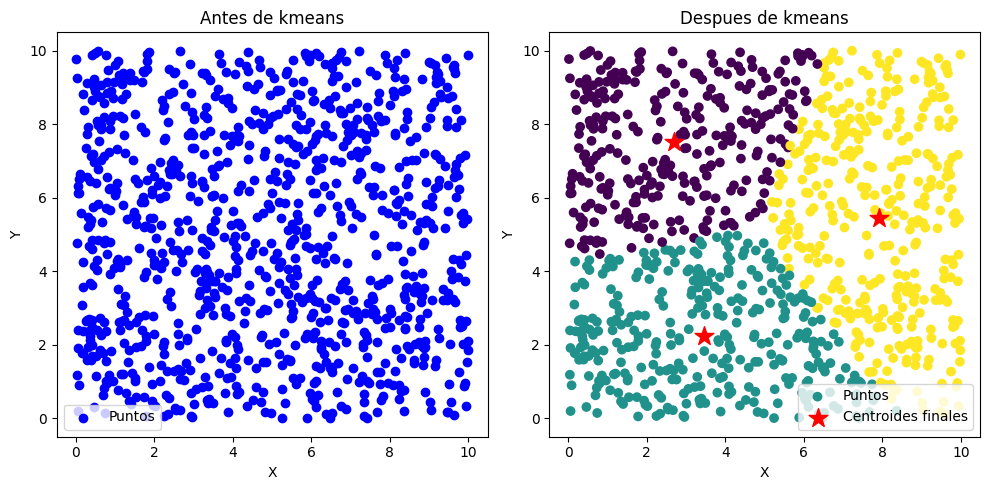

In [11]:
dibujar2D(points, kmeans.centroids, labels)

**100 ITERACIONES 2D**

In [12]:
points = np.random.rand(1000, 2) * 10  # Muestras entre 0 y 10 en ambas dimensiones
kmeans = KMeans(k=3, max_iter=100)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)#

[0 2 0 0 0 2 2 2 1 1 2 2 1 0 2 2 2 2 1 0 1 0 2 1 2 2 0 0 0 1 1 0 1 2 0 0 2
 2 2 0 0 2 2 0 0 1 0 0 0 1 0 2 2 0 2 2 0 0 0 0 2 0 1 1 1 0 1 2 2 0 0 2 1 0
 0 2 2 2 0 2 0 1 1 0 0 1 2 1 1 0 1 0 2 2 1 0 2 0 1 2 2 0 0 1 1 1 2 2 1 1 2
 1 1 1 2 0 2 2 2 1 2 1 2 0 1 0 0 1 1 1 2 1 0 2 2 0 1 1 0 1 2 1 2 0 2 0 2 2
 2 2 2 2 1 1 0 1 0 2 1 2 0 2 1 2 1 2 1 1 1 0 0 1 0 2 2 1 2 2 2 2 1 1 1 2 1
 1 0 2 2 1 0 0 0 1 0 0 1 0 2 2 2 1 0 2 2 2 1 0 1 2 1 2 0 0 2 2 2 0 1 1 0 1
 2 2 0 0 2 1 0 2 2 2 1 2 1 0 1 1 1 2 0 2 1 0 1 1 2 2 2 1 2 0 2 0 0 2 0 2 2
 2 0 2 2 0 0 0 2 0 0 0 0 1 0 2 0 0 2 2 1 0 0 0 0 2 0 1 0 1 1 1 2 2 1 2 1 0
 1 1 2 1 1 0 0 1 0 0 1 1 1 0 1 0 1 2 1 1 0 0 2 2 2 0 2 0 2 0 1 1 2 2 1 0 1
 0 1 2 2 0 0 0 2 1 2 2 2 2 1 2 1 2 1 1 2 0 2 2 0 0 2 2 0 1 1 1 0 1 1 2 0 0
 0 2 1 0 0 1 2 2 0 2 1 1 2 1 1 2 1 0 0 0 1 0 1 1 2 1 0 0 1 1 1 0 0 2 2 2 0
 1 2 1 0 2 0 1 1 0 0 2 1 0 2 1 1 1 2 0 0 2 2 2 2 1 1 2 1 2 0 0 2 2 1 2 2 2
 1 2 1 1 2 1 1 2 0 2 0 1 2 0 2 2 1 2 1 2 2 1 2 0 0 1 0 0 0 2 2 0 2 1 1 0 0
 0 2 2 2 1 1 0 1 2 2 0 0 

In [16]:
points[50]

array([1.40461558, 7.93857674])

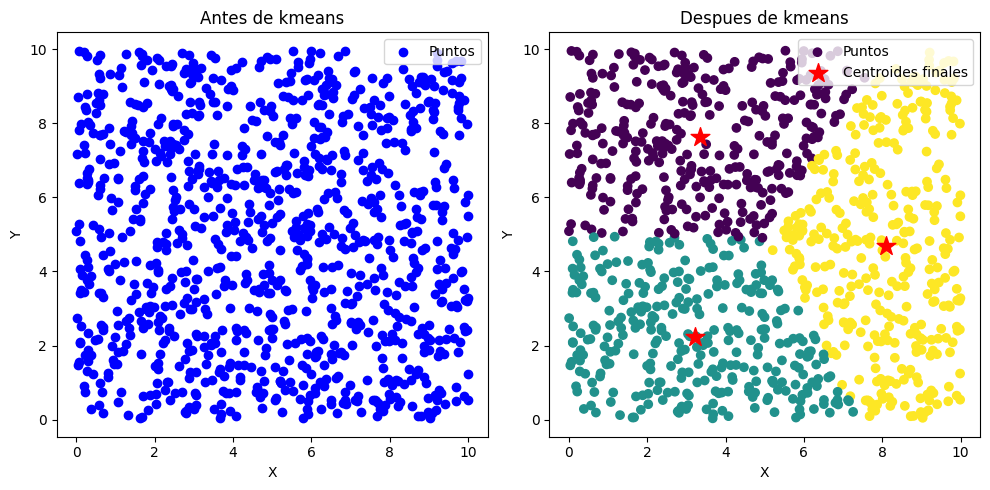

In [13]:
dibujar2D(points, kmeans.centroids, labels)

**1000 ITERACIONES 2D**

In [17]:
points = np.random.rand(1000, 2) * 10  # Muestras entre 0 y 10 en ambas dimensiones
kmeans = KMeans(k=3, max_iter=1000)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)#

[1 1 1 0 2 2 2 0 1 2 2 0 0 2 1 2 0 2 1 2 1 1 2 0 0 2 0 0 0 2 2 0 0 1 1 1 1
 1 2 0 2 0 0 1 2 0 1 0 0 2 1 2 0 1 0 1 1 0 2 2 1 1 0 1 0 2 1 2 2 0 0 2 1 2
 0 1 1 1 2 1 2 2 2 0 0 2 0 1 2 1 0 1 1 1 1 0 2 0 0 1 1 0 1 0 0 0 0 0 0 0 0
 1 1 1 0 2 0 1 0 1 2 2 1 0 2 1 2 2 0 0 0 0 2 1 0 0 0 2 2 0 0 1 0 1 1 1 0 2
 2 2 0 2 2 0 0 0 2 2 1 2 1 0 2 0 2 0 2 1 1 2 2 0 2 1 1 1 2 0 1 1 2 0 0 0 2
 2 1 1 0 0 2 0 1 2 1 2 0 0 2 2 2 0 2 0 1 1 0 0 2 2 0 1 1 0 2 2 0 1 1 2 0 0
 2 1 2 0 1 0 0 2 0 2 1 1 0 0 2 2 1 1 1 1 2 0 2 0 0 2 1 0 2 1 2 0 0 1 1 1 2
 0 0 1 0 2 0 1 2 2 2 0 0 2 0 2 1 0 1 0 2 1 0 1 2 2 1 2 0 2 2 1 0 2 2 2 2 2
 2 2 2 1 0 2 0 0 0 2 2 1 1 1 1 1 1 0 1 2 0 0 0 0 2 0 1 2 0 1 2 1 1 2 0 0 1
 0 2 0 1 1 0 1 1 0 2 2 2 1 1 0 2 2 0 0 1 1 1 1 2 1 2 2 1 1 0 0 0 1 2 0 1 0
 2 0 0 1 0 2 0 2 1 1 0 1 0 1 0 1 0 0 1 2 0 1 0 1 1 2 0 2 0 0 1 1 1 0 0 2 1
 2 0 2 2 2 0 1 1 2 0 0 1 1 0 2 0 0 1 0 1 2 0 0 2 2 0 2 0 2 0 1 1 1 0 2 0 2
 2 0 1 0 0 0 2 1 2 0 0 0 2 0 0 0 1 2 0 1 2 0 2 2 0 2 2 1 1 0 1 0 1 0 0 2 2
 2 2 2 0 2 0 1 1 2 2 2 2 

In [18]:
points[50]

array([3.11691294, 2.84374423])

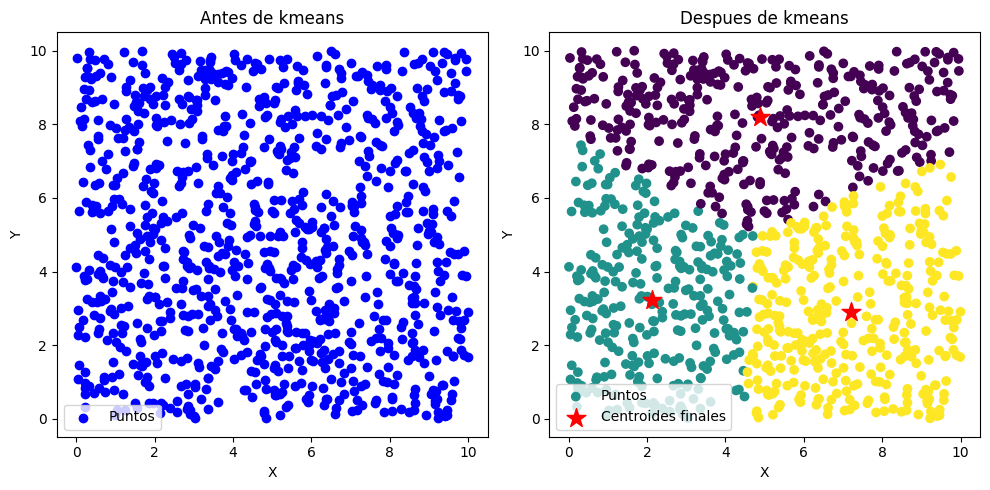

In [19]:
dibujar2D(points, kmeans.centroids, labels)

**10000 ITERACIONES 2D**

In [20]:
points = np.random.rand(1000, 2) * 10  # Muestras entre 0 y 10 en ambas dimensiones
kmeans = KMeans(k=3, max_iter=10000)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)#

[1 1 1 2 0 2 2 0 1 0 1 2 2 2 2 2 0 0 0 0 2 2 0 0 1 0 2 0 0 2 0 2 0 2 2 2 0
 0 1 0 0 1 2 2 0 1 2 2 2 0 1 2 0 2 2 0 1 1 0 0 1 1 2 0 1 1 0 0 2 0 0 1 0 0
 1 0 1 0 1 2 1 1 1 1 2 0 2 1 1 2 1 0 1 1 0 1 0 2 1 0 0 1 2 1 0 0 0 0 1 1 2
 0 1 1 1 2 1 0 2 1 0 0 1 1 1 2 1 2 0 2 2 2 0 0 0 0 2 2 2 0 0 2 0 2 2 2 1 1
 2 2 1 0 1 0 2 2 0 2 1 1 2 0 1 0 2 2 2 0 0 1 2 1 0 0 2 0 1 2 0 1 0 0 1 2 0
 2 1 2 2 2 2 1 2 0 2 1 0 2 0 2 1 0 1 0 0 0 0 0 2 2 1 1 2 2 1 1 2 2 1 2 1 1
 1 1 1 2 2 1 2 2 1 1 0 1 1 0 1 1 0 2 0 1 2 0 0 0 0 2 1 1 2 0 1 1 0 2 2 0 0
 1 1 1 2 0 1 2 2 2 0 0 1 0 2 2 1 0 2 1 0 1 0 2 2 1 2 2 2 0 2 2 1 2 1 0 0 1
 2 2 2 1 0 2 2 1 0 1 1 1 0 1 2 2 0 1 0 0 1 2 1 2 2 0 2 0 2 1 0 2 1 2 2 0 2
 1 0 1 0 1 2 0 1 1 2 0 0 2 2 1 0 1 1 1 2 2 1 2 2 1 0 2 2 1 0 0 0 0 2 2 1 0
 1 2 0 1 2 2 2 2 1 0 0 1 1 2 1 0 1 2 2 1 2 0 0 1 0 2 2 2 1 1 0 0 2 1 2 0 2
 1 1 0 1 0 0 0 2 0 2 0 2 2 2 2 0 2 0 0 0 0 0 2 2 0 2 2 0 0 2 2 2 2 2 2 1 0
 0 1 1 0 0 0 1 0 2 1 0 0 1 1 1 2 2 0 1 2 2 0 2 0 2 2 0 2 0 0 1 0 2 0 0 0 2
 0 0 2 2 2 1 1 2 2 0 1 1 

In [21]:
points[50]

array([6.70742303, 4.73184589])

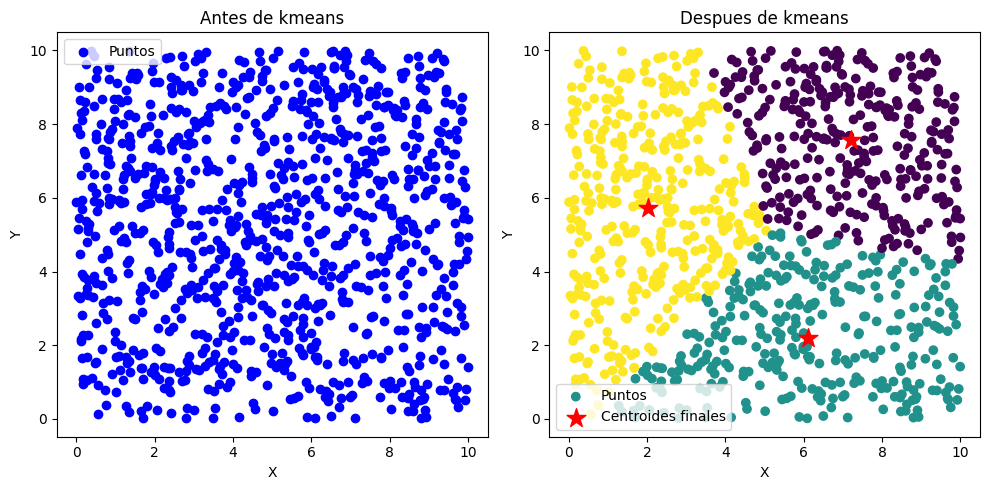

In [22]:
dibujar2D(points, kmeans.centroids, labels)

**2: 10   ITERACIONES  3D**

In [24]:
points = np.random.rand(1000, 3) * 10  # Muestras entre 0 y 10 en ambas dimensiones
kmeans = KMeans(k=3, max_iter=10)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)#

[1 2 2 1 0 0 1 1 1 0 1 1 0 1 1 1 1 0 2 1 2 2 0 2 1 2 2 1 1 0 0 2 0 1 0 2 0
 1 1 2 1 1 0 0 1 2 0 1 0 2 0 0 0 0 1 1 2 1 2 2 0 1 2 2 1 0 1 0 0 1 2 2 0 0
 1 2 1 1 2 1 0 1 0 0 0 2 1 1 1 1 0 0 2 1 2 0 1 2 1 0 2 0 2 0 0 0 0 1 0 1 0
 2 0 1 2 1 0 2 1 0 1 2 1 1 1 1 2 1 2 0 2 0 0 1 0 1 2 0 1 2 2 0 0 1 2 1 0 1
 0 2 1 2 2 2 1 2 0 2 0 2 0 0 1 2 2 1 0 0 1 2 0 0 2 1 1 2 1 2 1 1 0 1 2 1 2
 1 1 1 1 2 0 0 1 0 2 2 1 2 1 1 2 1 1 1 2 0 1 1 0 0 2 2 1 0 1 1 0 0 1 2 2 1
 0 0 1 0 1 1 0 0 1 0 1 0 2 2 2 2 1 1 1 2 1 2 1 2 2 0 1 1 0 1 2 2 1 1 2 2 0
 1 2 0 2 1 0 1 0 2 1 2 0 2 2 2 0 1 2 2 2 0 0 2 1 2 0 1 0 0 1 2 2 0 2 2 1 0
 1 1 0 2 1 2 1 1 0 0 2 2 2 0 1 1 0 0 2 2 2 2 0 2 0 1 1 0 0 1 1 1 0 2 2 1 0
 2 1 1 0 1 2 2 0 2 1 2 2 0 0 2 0 2 2 1 0 1 2 0 0 2 0 0 1 1 0 1 0 2 1 2 2 2
 2 0 0 1 2 1 2 1 1 2 2 0 2 2 2 1 1 2 0 0 2 2 1 0 0 2 0 2 1 1 0 2 0 0 1 0 1
 0 0 2 1 1 1 1 2 2 2 0 1 2 2 1 2 2 1 2 1 1 0 1 1 0 2 1 2 2 2 1 0 1 1 1 1 2
 1 0 1 1 0 1 0 2 1 1 1 0 0 2 2 2 0 1 1 1 1 0 0 1 2 1 1 2 1 1 0 2 0 0 2 1 0
 0 2 0 1 2 2 1 2 2 1 1 0 

In [29]:
points[20]

array([5.77749873, 2.43289744, 9.50571045])

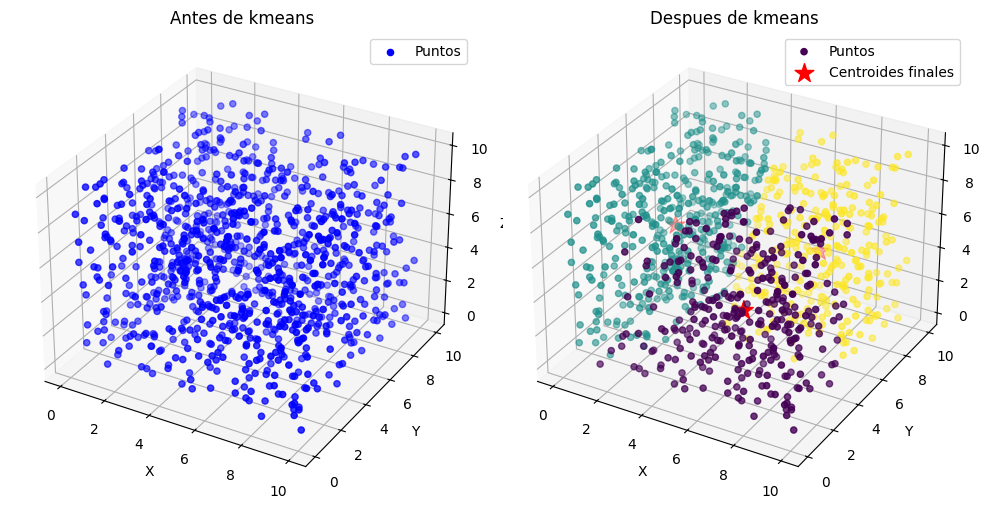

In [30]:
dibujar3D(points, kmeans.centroids, labels)

**100 ITERECIONES 3D**

In [31]:
points = np.random.rand(1000, 3) * 10  # Muestras entre 0 y 10 en ambas dimensiones
kmeans = KMeans(k=3, max_iter=100)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)#

[1 2 1 2 0 0 1 2 2 0 1 0 0 0 0 2 1 2 0 1 2 2 0 0 0 2 2 2 0 2 0 2 0 2 1 2 0
 0 2 0 1 2 2 2 0 2 1 2 0 0 2 2 1 2 0 2 2 0 0 0 2 2 1 2 1 1 0 0 2 0 2 2 0 2
 2 1 0 1 2 0 1 2 2 0 1 1 1 2 1 0 2 2 2 0 0 1 0 0 1 0 1 0 0 2 1 1 0 1 2 0 1
 2 0 1 2 1 1 0 2 2 0 0 0 0 0 2 1 0 0 2 2 1 0 1 0 1 0 2 1 0 2 2 0 1 2 1 0 2
 1 2 2 0 1 1 1 0 0 2 1 1 2 1 0 2 2 1 0 2 2 2 1 0 1 1 2 0 0 0 2 2 1 2 1 0 0
 2 2 0 1 2 1 1 0 2 0 2 2 0 2 2 2 0 0 2 1 2 0 2 1 1 2 0 1 2 0 1 2 1 0 1 2 1
 2 0 0 0 0 2 0 2 2 1 2 0 0 0 1 1 2 1 0 1 2 0 2 2 2 1 1 0 2 2 2 0 2 1 2 0 1
 2 1 1 0 0 2 2 2 1 2 1 0 2 2 0 1 1 2 2 1 0 0 2 0 1 2 2 2 1 2 2 0 1 2 0 0 0
 2 2 2 0 2 0 0 1 2 1 1 2 0 1 0 0 0 0 1 1 0 2 2 0 2 1 1 1 1 0 2 2 2 1 0 2 2
 0 0 2 1 2 0 0 1 0 1 2 0 2 1 2 0 0 2 0 2 0 0 1 1 0 0 2 0 0 2 1 2 0 2 1 1 2
 0 2 0 2 1 0 1 2 1 2 1 2 0 1 2 0 1 0 2 1 2 1 1 0 0 2 0 1 1 1 1 2 0 2 0 2 2
 1 1 2 2 0 0 1 0 2 1 0 2 1 1 1 1 0 1 2 2 2 2 0 0 0 0 2 0 2 2 1 1 1 0 2 2 0
 2 1 0 2 0 2 1 0 2 2 1 0 0 0 1 1 1 0 0 0 2 0 2 1 0 2 2 0 2 2 0 2 2 2 0 0 2
 0 2 2 1 2 0 2 1 1 0 1 0 

In [32]:
points[20]

array([0.27958552, 1.92290781, 1.98653687])

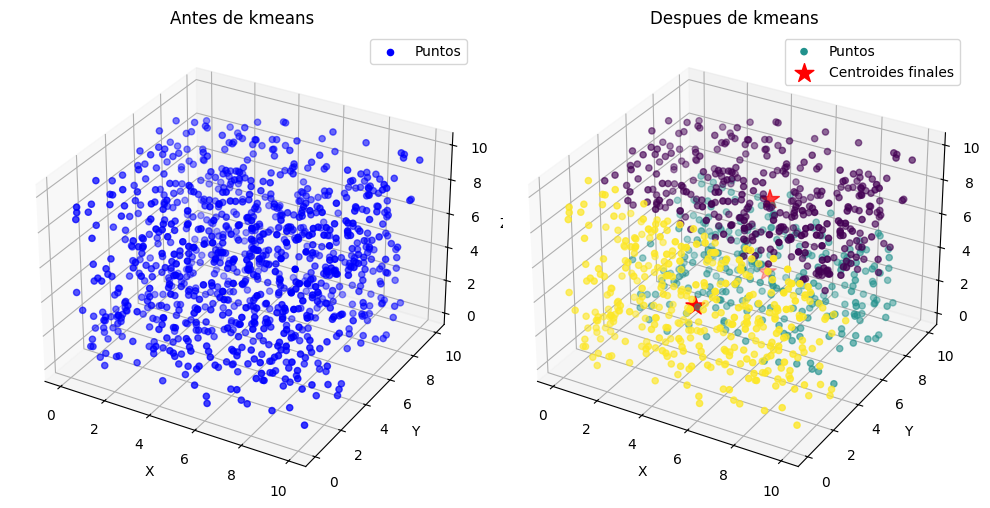

In [33]:
dibujar3D(points, kmeans.centroids, labels)

**1000 ITERACIONES 3D**

In [34]:
points = np.random.rand(1000, 3) * 10  # Muestras entre 0 y 10 en ambas dimensiones
kmeans = KMeans(k=3, max_iter=1000)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)#

[2 2 2 0 0 1 1 1 2 0 1 2 1 1 0 2 2 2 2 2 0 1 1 1 1 2 1 2 2 0 0 2 1 2 2 1 0
 0 1 0 0 2 1 2 2 1 2 0 2 2 0 1 1 2 0 1 1 0 2 0 2 1 0 0 1 0 0 0 0 1 1 0 1 2
 2 0 0 2 0 1 2 1 1 1 0 2 1 0 1 2 0 1 2 1 0 0 2 0 0 1 0 0 0 0 1 2 2 0 1 2 2
 2 1 1 0 2 0 1 1 2 1 2 0 0 2 0 0 0 1 0 2 0 1 0 1 0 0 0 1 2 1 2 1 1 0 2 0 0
 2 2 0 0 1 0 0 0 2 0 0 2 0 1 2 2 1 0 2 1 2 2 2 0 0 0 0 2 2 1 0 1 1 2 1 1 1
 1 1 1 2 1 1 0 2 1 2 2 2 0 2 2 2 0 1 2 2 2 0 0 2 0 0 0 2 2 2 1 0 0 2 1 0 1
 1 1 0 1 0 2 0 2 2 0 0 1 2 1 2 0 1 0 1 2 0 1 1 2 2 0 1 1 1 0 1 2 1 0 1 2 2
 0 1 1 1 2 1 1 1 1 0 0 1 1 2 1 2 0 1 2 2 0 0 1 2 2 2 0 0 2 1 1 0 1 2 1 0 0
 2 1 2 0 1 0 2 2 2 1 0 0 0 1 2 1 1 2 0 1 2 1 1 0 1 0 1 1 2 0 2 2 2 0 0 0 2
 2 2 2 0 1 2 1 1 2 2 0 1 2 0 2 1 1 0 2 2 2 0 1 2 1 1 2 2 0 1 1 0 1 0 0 0 0
 2 1 2 2 1 1 2 1 1 2 0 0 0 2 1 2 2 0 1 0 0 2 2 2 2 2 0 1 2 2 2 0 2 2 2 0 1
 2 2 0 2 2 0 0 2 0 2 2 2 1 0 2 2 1 1 1 1 0 1 2 1 1 0 2 1 2 0 1 2 2 0 2 2 1
 2 0 2 2 2 1 1 2 0 1 1 2 2 0 1 1 2 2 1 0 2 1 0 0 1 1 0 0 2 2 2 2 0 1 0 1 2
 2 2 0 1 2 0 1 2 1 1 0 0 

In [35]:
points[20]

array([6.31678083, 8.05326373, 8.87275822])

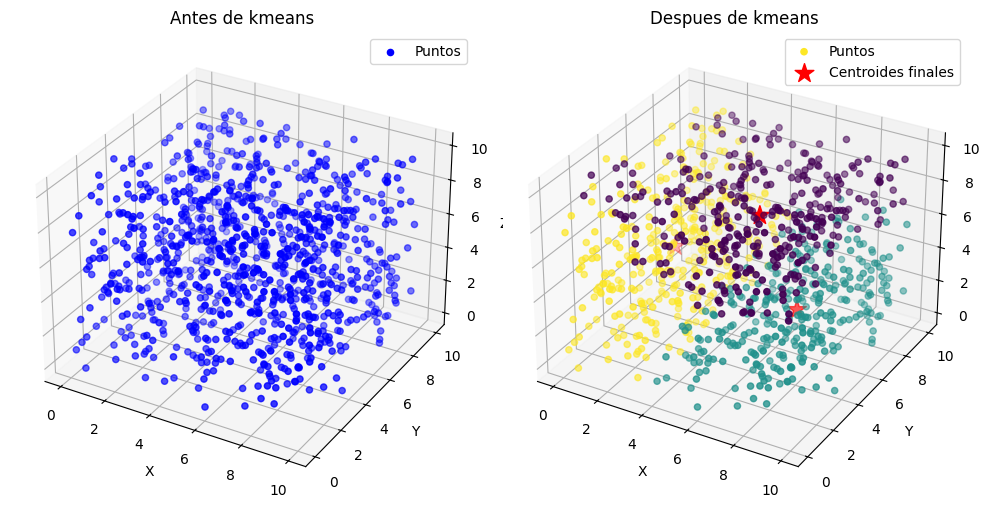

In [36]:
dibujar3D(points, kmeans.centroids, labels)

**10000 ITERACIONES 3D**

In [37]:
points = np.random.rand(1000, 3) * 10  # Muestras entre 0 y 10 en ambas dimensiones
kmeans = KMeans(k=3, max_iter=10000)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)#

[1 2 2 1 0 1 0 0 1 2 2 0 1 0 0 2 1 0 1 0 2 2 2 2 0 1 2 2 2 0 2 0 0 0 1 0 1
 1 2 2 0 1 2 1 1 0 0 0 2 1 1 2 1 1 2 0 2 2 1 1 1 2 1 1 0 1 0 0 2 2 0 2 1 2
 1 2 0 1 2 2 0 2 0 2 0 1 1 1 0 2 0 0 1 2 0 2 2 0 2 1 1 2 0 0 0 2 1 0 1 0 2
 0 2 0 0 2 2 1 0 1 0 0 0 1 1 1 0 2 0 0 0 0 1 2 2 0 0 2 1 0 0 2 0 1 0 0 2 2
 2 2 1 0 0 1 0 2 0 1 1 1 1 2 1 2 2 2 0 2 1 0 0 1 0 1 2 2 2 1 0 1 2 2 0 1 2
 0 1 1 2 1 1 0 0 0 1 2 1 2 2 1 1 1 2 1 1 2 1 0 1 0 1 1 2 0 0 2 1 2 0 1 2 2
 2 0 1 2 1 2 2 0 1 0 0 1 2 2 0 0 1 1 2 2 0 2 1 0 0 0 0 0 1 1 2 1 2 2 2 0 2
 1 0 1 2 0 0 2 2 0 0 0 1 0 2 0 0 1 0 0 1 1 0 0 0 0 2 1 0 0 0 2 0 0 2 2 2 1
 2 2 1 0 0 0 1 2 1 2 0 2 1 0 2 2 2 2 1 0 1 1 0 1 2 0 0 1 1 1 2 0 0 0 1 1 2
 1 0 1 0 2 0 0 0 0 1 1 2 0 0 2 1 1 2 0 1 2 2 1 1 1 2 1 1 1 1 0 1 1 1 1 0 2
 2 0 2 0 2 2 1 0 2 0 2 1 2 1 2 2 1 0 1 2 0 2 0 2 2 2 2 1 2 2 0 1 1 0 1 1 2
 0 2 2 2 1 0 1 0 2 1 1 2 2 2 2 2 0 0 2 0 1 1 2 2 1 0 1 0 2 0 0 2 0 1 0 1 2
 2 0 1 1 0 2 1 2 1 0 0 0 0 0 1 0 0 2 1 2 0 0 0 1 2 1 0 0 2 1 1 2 1 0 0 1 1
 2 1 1 0 1 2 2 1 1 2 2 1 

In [38]:
points[20]

array([4.44470084, 5.58908624, 6.1607006 ])

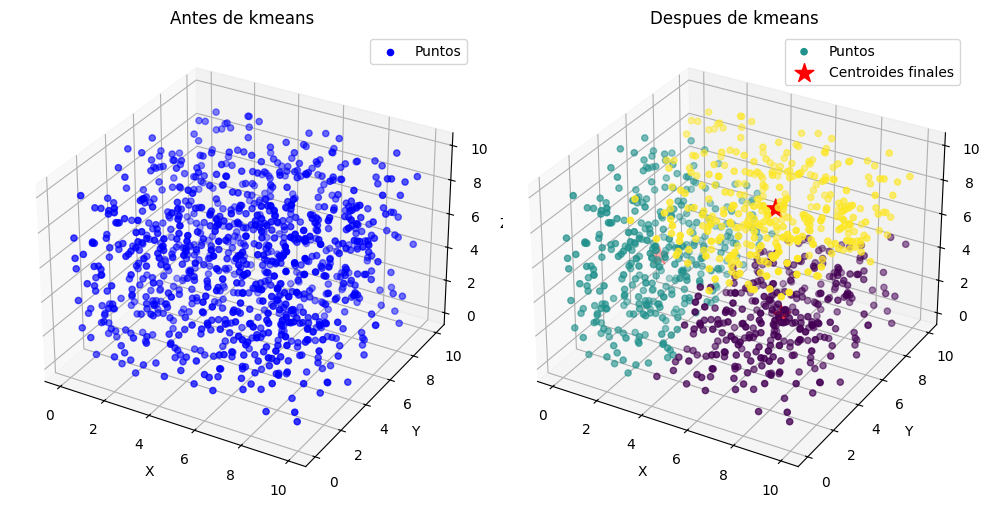

In [39]:
dibujar3D(points, kmeans.centroids, labels)

**3: 10 ITERACIONES 10D**

In [40]:
points = np.random.rand(1000, 10) * 10  # Muestras entre 0 y 10 en ambas dimensiones
kmeans = KMeans(k=3, max_iter=10)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)#

[0 1 0 1 2 2 1 1 2 0 0 0 0 2 2 0 0 0 1 1 2 1 1 2 0 2 0 0 0 1 2 0 0 0 2 2 1
 2 0 0 0 1 0 1 2 1 1 2 2 2 1 2 1 1 0 1 0 2 1 1 2 0 2 0 0 2 2 1 0 1 0 2 0 1
 1 0 2 1 1 1 1 0 0 1 0 1 1 2 2 1 1 0 2 1 2 0 0 1 1 2 2 1 2 1 1 1 0 1 1 0 0
 1 2 1 0 0 0 2 2 2 0 1 2 0 1 1 1 0 1 1 0 0 0 1 2 1 2 1 2 2 1 1 2 1 2 1 2 1
 1 0 2 2 1 0 2 1 1 0 1 2 0 2 1 1 2 0 0 1 1 1 0 0 1 2 1 0 2 1 1 0 0 2 0 0 1
 0 1 1 0 1 0 2 1 0 2 2 0 1 2 1 2 0 0 0 2 2 0 1 0 2 2 1 1 1 2 1 2 2 2 1 2 1
 0 0 0 0 2 1 2 0 1 2 0 1 0 1 1 2 1 1 1 1 2 0 0 2 0 2 1 1 2 0 2 1 2 0 2 0 1
 0 0 2 1 2 1 2 1 0 2 0 2 1 1 2 1 1 2 2 1 0 1 1 2 1 1 0 1 1 0 2 2 2 2 2 0 1
 1 0 1 0 2 2 2 1 1 2 2 0 0 2 1 1 2 2 1 0 2 0 2 2 0 1 2 1 2 2 0 1 1 2 0 2 0
 1 0 2 1 1 2 2 2 0 0 0 0 0 2 2 1 0 2 2 0 1 0 1 2 0 1 1 0 2 2 1 0 2 1 2 1 0
 0 1 2 0 2 2 0 2 2 2 0 0 0 2 1 0 2 2 2 0 1 2 0 1 1 0 1 2 2 0 0 0 1 1 0 1 1
 0 2 0 2 0 2 2 0 0 1 1 0 1 1 1 1 2 0 0 0 0 0 2 1 2 2 0 2 1 2 1 2 0 0 1 0 0
 1 0 2 0 0 2 1 0 0 2 1 0 0 0 2 2 2 0 1 0 0 0 0 1 0 0 0 0 0 2 1 0 0 0 2 1 2
 0 2 0 2 0 2 0 1 1 0 1 0 

In [41]:
points[20]

array([7.74540405, 2.04025954, 4.223584  , 1.74282411, 1.43824059,
       5.28994067, 2.23096481, 0.50111842, 8.26341325, 1.85520205])

**100 ITERACIONES 10D**

In [42]:
points = np.random.rand(1000, 10) * 10  # Muestras entre 0 y 10 en ambas dimensiones
kmeans = KMeans(k=3, max_iter=100)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)#

[0 0 0 0 0 0 0 0 0 2 0 0 1 0 1 0 1 2 1 2 1 2 0 1 1 0 2 0 0 0 0 2 2 0 0 2 0
 0 0 2 0 1 0 0 1 1 2 1 1 0 1 1 0 2 1 0 2 1 0 2 1 0 2 2 1 2 0 2 0 1 2 0 2 1
 2 2 2 2 0 0 2 1 0 1 1 2 1 0 0 2 2 2 0 0 2 0 2 2 2 1 0 1 0 0 2 2 1 0 2 0 0
 1 0 1 1 2 2 0 0 2 1 0 1 2 2 2 2 2 1 1 0 2 2 1 2 2 1 0 0 2 0 1 2 0 1 2 0 2
 2 1 1 0 0 1 2 1 2 0 1 1 0 0 0 2 2 0 1 0 2 1 2 0 2 0 0 1 1 0 1 2 0 2 2 1 1
 2 2 0 1 2 1 0 0 2 1 2 0 1 0 0 1 0 0 2 2 1 0 2 2 1 2 2 0 2 0 1 2 2 0 1 0 2
 0 1 1 2 2 0 0 0 2 2 0 0 2 1 1 1 0 0 0 2 2 0 1 2 0 1 0 0 2 2 1 0 1 0 1 0 2
 0 0 2 1 1 2 0 1 2 1 2 0 2 0 2 1 1 0 2 1 2 1 1 1 0 0 0 2 0 0 0 0 0 1 0 1 0
 2 1 2 2 1 2 1 2 0 0 0 1 2 1 0 0 1 2 0 0 0 2 1 1 0 0 1 1 0 2 2 0 0 0 1 2 2
 0 1 2 2 0 0 2 0 0 2 1 0 2 0 0 1 0 2 2 2 0 1 1 1 0 2 1 1 0 2 2 1 2 0 1 1 2
 0 2 0 2 2 0 2 0 0 0 2 2 1 1 1 1 0 0 0 2 1 2 0 1 2 1 2 0 1 0 2 2 1 0 1 0 1
 2 1 0 1 0 2 0 2 0 1 1 0 1 1 2 1 2 2 2 0 0 1 0 1 2 1 1 2 1 1 2 1 1 1 2 0 1
 2 0 2 1 0 2 1 2 2 0 0 2 2 0 2 0 1 0 1 1 2 1 2 1 0 0 0 0 0 1 1 0 2 2 0 0 1
 1 0 1 0 2 1 0 2 0 2 2 0 

In [43]:
points[20]

array([4.1257112 , 8.15520857, 8.63007777, 4.3867568 , 2.91844853,
       6.34910343, 3.36766022, 8.98580487, 2.3158573 , 0.73760951])

**1000 ITERACIONES 10D**

In [44]:
points = np.random.rand(1000, 10) * 10  # Muestras entre 0 y 10 en ambas dimensiones
kmeans = KMeans(k=3, max_iter=1000)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)#

[1 1 0 2 2 0 0 1 0 0 0 0 2 0 0 2 1 1 0 0 0 1 0 2 2 0 0 2 1 1 0 2 0 0 2 2 1
 2 0 0 0 2 0 0 0 1 1 2 1 0 2 0 0 2 2 2 0 0 2 0 0 0 1 2 2 1 0 2 1 2 2 0 2 1
 1 1 0 2 0 1 2 1 1 0 0 1 1 1 2 1 0 2 0 2 2 1 2 0 0 1 1 2 0 0 2 0 1 2 2 2 1
 1 0 0 1 0 2 2 1 0 2 0 1 2 0 1 2 1 1 0 1 1 0 1 0 2 0 2 0 0 1 1 0 2 0 1 0 0
 0 1 0 1 2 0 0 2 0 1 0 0 0 1 2 2 0 1 0 0 0 2 0 2 2 0 2 2 1 1 0 2 1 1 2 1 1
 0 1 0 1 0 2 0 0 0 1 0 1 0 0 2 0 1 2 2 2 0 0 1 1 2 0 1 0 2 0 2 1 1 1 1 2 0
 1 0 2 0 2 0 2 1 2 0 0 0 0 0 0 2 1 1 0 0 0 1 0 1 0 0 2 2 2 0 0 2 0 2 0 0 1
 2 1 1 0 2 0 2 1 0 0 0 0 1 2 2 0 2 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 2 0 1 1 0
 0 0 1 2 1 1 0 1 0 0 1 0 1 0 1 0 0 0 1 1 0 0 2 0 1 2 1 0 2 0 2 1 2 0 0 1 0
 0 1 2 1 0 2 0 0 1 2 0 0 1 1 0 1 1 1 2 0 0 1 0 0 1 1 0 0 0 2 0 2 0 0 2 2 2
 1 0 0 0 0 1 2 0 2 0 2 2 1 1 0 2 0 2 1 1 1 1 2 0 0 0 2 1 1 0 0 1 2 2 2 2 2
 0 2 0 2 0 0 0 0 2 0 1 2 0 2 2 0 1 2 2 0 2 0 1 0 1 2 2 0 2 2 0 1 2 2 2 0 2
 0 0 2 1 1 0 2 1 1 1 0 2 0 0 2 0 0 2 1 0 2 0 1 1 1 2 0 2 1 1 0 2 2 0 0 0 1
 0 1 1 1 1 2 0 1 0 0 0 2 

In [45]:
points[20]

array([5.37325756, 7.15575055, 9.37132418, 9.9839076 , 7.15404645,
       3.20571875, 5.20858571, 3.4198656 , 7.42505623, 3.81919912])

**10000 ITERACIONES 10D**

In [46]:
points = np.random.rand(1000, 10) * 10  # Muestras entre 0 y 10 en ambas dimensiones
kmeans = KMeans(k=3, max_iter=10000)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)#

[0 0 0 1 0 1 1 2 1 0 1 2 1 0 0 2 1 0 1 1 0 2 2 2 2 0 1 2 1 2 2 0 1 2 1 0 0
 1 1 1 0 0 2 0 2 1 0 0 0 1 2 1 0 1 1 0 2 0 2 0 0 2 1 1 2 2 1 2 2 1 1 1 1 2
 2 0 0 0 1 1 0 2 1 2 0 2 2 1 2 2 2 0 0 0 1 2 2 1 1 1 2 1 0 1 1 1 2 0 1 2 0
 1 1 0 2 2 1 0 2 1 2 2 2 2 2 2 2 0 2 0 2 1 0 0 2 1 2 2 0 0 1 2 1 0 1 1 2 0
 1 0 2 0 1 0 2 2 0 1 2 0 2 2 1 2 2 0 1 2 1 0 1 2 1 1 2 1 2 1 2 2 2 2 1 2 2
 2 2 2 1 2 0 2 2 2 0 0 0 2 1 2 1 2 0 1 2 1 2 0 2 1 1 2 2 2 2 0 1 0 0 2 1 2
 0 2 0 1 1 2 1 0 2 2 2 2 2 0 1 2 0 2 2 2 1 0 1 2 1 0 1 1 2 1 1 0 2 1 2 2 2
 1 0 2 2 0 0 2 0 0 1 2 1 1 0 2 0 2 0 0 2 2 0 1 1 0 1 2 1 0 0 0 1 2 0 0 0 0
 0 2 1 1 0 1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 0 2 2 0 1 1 0 0 1 2 0 0 0 1
 1 2 2 2 0 0 0 2 2 1 0 2 0 1 0 2 0 2 1 1 1 1 2 0 0 2 1 0 2 1 1 2 1 1 1 2 1
 1 2 1 2 1 1 0 1 1 2 1 2 1 1 1 2 2 0 1 0 1 2 2 0 0 2 0 2 1 2 1 0 2 0 2 2 1
 1 2 2 0 0 0 2 1 2 2 2 1 0 2 2 0 0 2 0 2 0 2 2 2 0 0 2 1 1 2 2 1 1 1 0 2 1
 0 1 1 1 1 2 2 1 0 2 0 0 0 0 0 2 0 2 1 0 0 1 2 1 1 0 1 1 0 1 2 0 1 2 0 0 2
 0 0 2 0 1 1 0 1 1 2 2 1 

In [48]:
points[20]

array([2.87796002, 1.07111329, 0.98042829, 0.36211129, 6.77496056,
       7.29700636, 1.77649883, 1.92386011, 7.19249468, 7.77753095,
       5.32309156, 3.18628415, 2.59519676, 6.34120971, 8.23370231,
       7.04004769, 2.72877068, 8.74119671, 4.10985184, 4.67870399,
       8.68193885, 0.61845299, 1.52538577, 6.01543212, 1.97100806,
       8.00114092, 3.13692319, 0.57118862, 6.93518327, 5.11836668,
       4.80758664, 3.53048795, 3.64140687, 7.98427269, 8.56692837,
       7.48201487, 6.49540283, 1.56749851, 5.1376141 , 4.15946933,
       1.29032218, 2.01511108, 4.46535315, 5.20953763, 6.46087912,
       7.42106954, 2.31966661, 1.14642579, 6.13672917, 2.91206408,
       1.84366384, 1.52045059, 5.26221387, 2.84185804, 9.57108169,
       8.97931681, 3.64486098, 6.51988596, 7.56556409, 4.74137434,
       6.45672999, 0.90804889, 5.57280067, 2.69946815, 9.9804238 ,
       4.37772847, 0.07142291, 7.3672845 , 8.84335805, 0.43432238,
       4.07212067, 7.43032283, 1.92425344, 0.82294051, 3.51910

**4: 10 ITERACIONES 100D**

In [47]:
points = np.random.rand(1000, 100) * 10  # Muestras entre 0 y 10 en ambas dimensiones
kmeans = KMeans(k=3, max_iter=10)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)#

[2 0 0 1 2 0 0 2 1 2 2 0 0 2 1 1 2 2 0 2 1 1 1 1 0 2 0 1 2 2 1 0 2 1 1 2 1
 1 0 0 2 2 2 1 0 2 1 2 0 2 0 2 2 2 0 2 0 2 2 0 1 1 0 2 1 2 2 0 2 1 1 2 0 1
 2 0 2 0 0 1 0 1 1 2 2 1 2 2 2 2 1 0 0 1 2 2 0 2 1 0 2 2 2 0 1 2 2 0 1 0 0
 2 2 2 0 1 0 0 1 2 2 2 2 1 0 2 2 0 2 0 2 2 2 2 1 1 2 0 2 0 1 0 2 0 2 2 2 2
 0 0 0 0 2 1 0 0 2 1 0 2 2 2 0 0 2 1 2 2 1 1 0 2 2 2 2 0 2 2 2 0 0 1 2 1 2
 0 2 0 2 0 0 1 0 2 2 0 0 1 2 0 0 2 0 2 2 2 2 2 1 0 2 1 2 0 2 0 0 1 0 1 2 0
 1 0 2 1 1 1 1 2 0 2 0 2 2 0 2 2 0 2 2 2 2 2 2 2 2 0 0 2 0 0 0 0 2 2 1 2 2
 1 0 0 0 2 0 0 0 2 2 0 2 2 1 0 1 2 1 0 0 0 1 2 1 0 1 0 2 0 2 2 0 1 0 2 2 1
 0 2 0 0 0 0 2 0 0 1 1 1 2 0 1 0 1 0 0 0 1 0 2 0 2 1 0 1 1 1 0 1 0 2 0 0 0
 2 1 0 0 0 1 1 2 1 0 1 1 1 1 0 1 2 0 1 0 0 2 0 2 2 0 2 2 1 0 2 1 0 0 0 0 0
 0 1 1 1 0 0 0 0 1 2 2 2 2 2 2 2 2 2 1 0 1 0 1 0 2 0 0 1 1 0 0 1 2 1 1 1 0
 0 1 2 0 2 0 1 1 2 0 0 1 2 2 2 2 2 2 2 0 0 1 0 0 1 1 1 0 2 0 0 2 2 0 1 0 0
 2 1 1 1 0 0 1 0 0 2 1 0 1 0 0 2 0 2 0 1 0 0 1 2 2 0 2 1 0 0 0 0 2 0 0 0 1
 0 0 0 1 1 2 2 0 2 0 1 1 

In [49]:
points[20]

array([2.87796002, 1.07111329, 0.98042829, 0.36211129, 6.77496056,
       7.29700636, 1.77649883, 1.92386011, 7.19249468, 7.77753095,
       5.32309156, 3.18628415, 2.59519676, 6.34120971, 8.23370231,
       7.04004769, 2.72877068, 8.74119671, 4.10985184, 4.67870399,
       8.68193885, 0.61845299, 1.52538577, 6.01543212, 1.97100806,
       8.00114092, 3.13692319, 0.57118862, 6.93518327, 5.11836668,
       4.80758664, 3.53048795, 3.64140687, 7.98427269, 8.56692837,
       7.48201487, 6.49540283, 1.56749851, 5.1376141 , 4.15946933,
       1.29032218, 2.01511108, 4.46535315, 5.20953763, 6.46087912,
       7.42106954, 2.31966661, 1.14642579, 6.13672917, 2.91206408,
       1.84366384, 1.52045059, 5.26221387, 2.84185804, 9.57108169,
       8.97931681, 3.64486098, 6.51988596, 7.56556409, 4.74137434,
       6.45672999, 0.90804889, 5.57280067, 2.69946815, 9.9804238 ,
       4.37772847, 0.07142291, 7.3672845 , 8.84335805, 0.43432238,
       4.07212067, 7.43032283, 1.92425344, 0.82294051, 3.51910

**100 ITERACIONES 100D**

In [53]:
points = np.random.rand(1000, 100) * 10
kmeans = KMeans(k=3, max_iter=100)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[1 1 1 0 2 2 2 1 2 2 2 1 1 1 0 1 2 2 2 2 0 1 0 1 2 2 0 2 1 0 0 2 2 0 1 2 1
 0 1 2 0 0 0 2 0 0 2 2 1 2 1 2 0 1 0 1 2 0 0 2 1 2 2 0 1 2 2 2 1 2 1 0 1 0
 2 1 0 2 1 2 2 0 2 0 0 0 0 1 1 1 1 0 2 0 2 0 1 2 0 0 0 0 2 0 0 1 1 0 2 0 0
 0 1 0 2 1 2 0 2 0 0 0 2 0 2 2 0 0 0 1 1 1 2 2 1 2 0 1 0 1 1 2 0 2 1 2 2 1
 0 0 1 2 1 1 1 0 1 2 1 1 1 1 1 2 1 2 2 1 1 1 1 0 1 0 0 1 1 1 2 0 0 1 0 2 0
 1 1 2 0 0 2 2 0 0 1 1 1 2 2 1 2 1 1 2 2 1 2 2 1 2 0 2 0 2 0 2 2 1 0 0 2 1
 1 1 2 1 1 1 1 1 2 1 2 0 0 1 2 0 2 2 1 1 1 2 1 0 2 1 2 0 2 1 2 2 2 2 1 2 1
 2 0 0 0 0 2 0 1 0 2 2 2 0 1 2 0 1 1 2 1 0 1 0 2 0 0 1 2 2 0 2 2 2 0 1 2 2
 0 1 2 2 0 1 1 0 2 2 0 0 2 1 1 1 1 0 0 1 2 2 2 2 2 0 2 0 1 1 2 0 2 1 0 2 0
 0 1 1 2 1 2 2 2 2 1 2 0 1 0 2 1 1 0 1 2 1 1 1 0 0 0 0 2 1 1 2 0 1 1 1 1 2
 1 1 2 2 2 2 0 1 2 0 0 2 1 0 1 1 1 2 2 0 2 0 0 1 0 1 1 1 2 0 1 0 2 2 1 2 2
 0 0 0 1 0 2 1 0 0 1 2 2 0 2 2 2 2 1 1 1 1 0 2 0 2 1 0 1 0 1 2 2 1 0 2 0 0
 2 0 0 1 1 1 2 1 1 1 0 2 2 0 1 1 1 1 1 0 2 2 0 2 0 2 1 2 0 0 1 2 0 2 0 1 1
 0 1 0 0 1 0 0 1 2 2 2 0 

In [51]:
points[20]

array([9.24789793, 3.52028478, 5.72907605, 2.61555089, 7.65150145,
       1.47881632, 8.51656703, 8.12673424, 4.69288313, 3.94004128,
       4.79423385, 1.85991167, 7.97772824, 3.0143963 , 7.84879999,
       2.9874279 , 1.7721927 , 5.28103464, 7.93514688, 6.67992539,
       1.29471172, 0.65621981, 4.67961272, 0.94152693, 4.92096816,
       7.47237976, 4.14403975, 5.87392848, 8.96284296, 7.23577145,
       2.42540342, 9.08909815, 6.81545903, 1.40427606, 5.45637506,
       5.22033673, 1.12320497, 9.71542666, 6.07521035, 8.05136878,
       3.74875933, 9.11726   , 0.54615962, 9.52189374, 8.92256828,
       0.62027591, 3.72227875, 2.76144041, 7.66077269, 5.67233784,
       0.96523477, 9.14441741, 1.56189316, 1.25294674, 3.7629928 ,
       9.42884106, 5.74166088, 8.38075785, 3.66687792, 4.61817207,
       5.02536936, 3.31724095, 4.39344463, 0.19230416, 3.67414508,
       9.76268938, 8.34154593, 6.58977704, 2.12791113, 4.06058258,
       9.32990225, 7.36789962, 7.73808706, 3.2162286 , 9.04680

**1000 ITERACIONES 100D**

In [52]:
points = np.random.rand(1000, 100) * 10
kmeans = KMeans(k=3, max_iter=1000)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[2 2 2 1 1 2 2 2 2 0 0 0 2 0 0 0 1 2 0 2 1 1 2 2 1 0 2 0 2 1 2 0 1 0 0 1 2
 1 0 2 1 1 1 0 2 2 0 1 0 0 2 0 2 0 2 0 1 0 0 1 1 0 2 2 0 2 2 2 0 0 1 1 0 0
 0 2 0 1 0 2 0 1 0 0 0 1 0 0 1 2 2 1 2 0 2 1 2 0 1 2 2 2 0 1 0 1 1 2 2 1 0
 0 0 0 1 0 2 0 0 1 1 0 1 2 1 2 1 1 2 0 0 2 2 0 1 1 0 1 2 0 2 0 2 0 0 0 1 1
 1 2 1 2 1 1 0 2 2 0 2 0 1 1 2 2 1 0 1 2 0 2 0 1 2 0 0 2 1 0 0 0 0 1 1 1 2
 0 0 0 0 0 0 0 1 0 1 2 2 2 1 1 0 2 1 0 0 2 0 0 0 0 1 2 2 1 0 0 0 2 1 0 0 0
 0 1 2 1 2 0 2 1 0 0 0 2 1 1 2 0 1 1 0 1 0 0 1 0 2 2 2 0 2 0 2 1 0 2 2 1 0
 1 1 0 2 2 2 1 0 2 2 1 1 1 2 0 2 0 2 2 1 2 2 2 1 2 0 1 0 2 2 2 0 1 2 1 1 2
 1 1 2 1 0 0 1 2 0 1 0 0 1 0 0 2 2 0 2 1 1 0 1 1 2 1 1 1 0 2 0 1 1 1 0 0 1
 1 1 1 1 0 0 2 1 0 1 0 2 0 2 0 1 1 0 1 1 1 0 2 1 0 0 2 0 0 0 2 0 1 0 1 0 2
 1 2 2 1 2 1 2 0 2 0 2 1 1 1 0 0 1 1 2 0 1 0 2 1 2 2 2 1 0 0 1 2 1 2 2 2 0
 2 2 1 2 0 0 0 1 0 1 1 1 0 0 2 2 1 1 2 2 2 0 1 2 0 0 1 1 1 0 0 0 0 1 1 2 2
 0 2 1 2 2 1 2 0 0 1 0 2 2 2 0 2 2 2 0 0 2 1 0 2 2 0 1 1 0 0 2 2 1 1 1 0 1
 0 1 1 0 0 1 0 1 1 2 1 2 

In [ ]:
points[20]

**10000 ITERACIONES 100D**

In [54]:
points = np.random.rand(1000, 100) * 10
kmeans = KMeans(k=3, max_iter=10000)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[0 0 1 0 2 1 1 2 2 2 1 2 2 2 2 2 2 0 1 2 0 0 1 1 1 0 0 2 1 0 2 0 1 1 2 2 0
 0 0 1 0 0 1 2 0 2 1 1 1 2 1 2 1 1 2 2 2 2 2 1 2 2 0 1 2 0 0 1 1 1 0 2 0 0
 1 2 1 2 1 1 2 1 2 1 2 0 1 0 2 1 0 2 2 1 1 2 2 1 0 2 1 0 2 1 2 2 1 1 0 0 2
 0 0 1 0 0 0 1 2 1 2 2 1 1 0 0 0 2 0 1 2 1 2 1 2 1 2 0 0 2 0 1 1 0 2 0 1 0
 0 0 0 1 2 1 1 0 2 2 0 1 0 0 0 0 1 2 1 2 2 0 0 1 1 0 0 1 1 0 2 2 2 0 0 1 1
 1 0 2 2 1 1 2 2 0 1 0 2 0 0 0 1 1 2 1 2 2 0 0 2 2 2 1 0 1 1 2 0 0 0 2 1 0
 0 2 2 1 1 0 1 0 1 1 0 0 1 2 1 1 1 0 1 0 0 1 1 1 1 2 0 2 1 2 2 0 2 0 0 2 2
 1 0 2 0 1 1 2 0 0 2 2 0 2 0 1 1 0 2 0 2 2 0 0 2 1 2 2 0 0 0 0 2 0 1 2 0 0
 2 0 2 0 0 1 0 2 1 0 0 1 0 1 2 2 2 1 2 0 0 1 1 1 1 0 2 0 1 1 0 1 0 1 0 1 1
 1 1 1 1 0 0 1 1 1 2 2 1 0 2 1 2 0 2 1 0 0 1 2 2 0 1 0 2 1 1 2 0 2 0 0 2 2
 2 1 2 2 0 1 0 1 1 2 1 1 0 2 1 2 2 1 0 2 2 0 1 1 0 0 1 0 0 1 1 2 2 1 2 1 2
 2 0 2 1 0 0 1 0 0 0 2 2 2 1 1 1 2 0 1 0 2 1 1 2 2 1 1 1 2 0 2 0 0 1 1 1 0
 2 1 0 2 0 2 2 0 2 0 2 1 1 2 1 2 1 1 1 1 2 1 1 2 2 2 2 2 0 0 1 1 2 0 2 2 1
 2 1 2 1 2 0 0 2 1 2 0 2 

In [55]:
points[20]

array([9.20268919, 5.01061454, 4.39845198, 9.71513457, 7.74377405,
       3.87881838, 8.82509555, 5.18544715, 5.58660496, 1.47450042,
       4.87977243, 5.74771426, 8.43214259, 9.99676114, 1.45202244,
       1.10679099, 6.90127983, 2.31288247, 8.9066724 , 1.52752477,
       0.42777396, 7.95773655, 5.70683858, 6.07568829, 3.8738722 ,
       2.04761089, 6.36934125, 3.88206409, 1.96175643, 2.60504234,
       7.1812132 , 9.64534201, 9.23396986, 3.8587058 , 3.50102803,
       0.66426893, 1.78769396, 8.35116169, 0.20693773, 1.69816269,
       8.86516923, 3.19661505, 3.29136265, 9.709343  , 4.49802263,
       5.13060251, 7.16074144, 3.00117845, 3.8555114 , 4.47531249,
       0.18727171, 0.67026852, 2.62017658, 5.09650275, 4.21827984,
       8.13879484, 1.02230637, 2.20065909, 9.2629523 , 0.25925318,
       6.30605731, 9.26782341, 2.76614364, 9.66517071, 3.33963671,
       7.50484183, 6.37070237, 1.67452786, 6.64036792, 3.77113142,
       9.78685538, 3.95936603, 6.98113251, 0.53281429, 8.40761

**5: DISTANTCIA EUCLIDIANA K: 2,3,5,10**   ---------- **K:2**

In [58]:
points = np.random.rand(1000, 3) * 10
kmeans = KMeans(k=2, max_iter=1000)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0
 1 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1
 1 0 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 1
 0 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0
 0 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 0
 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1
 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0
 1 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0
 1 1 0 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0
 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 1 1 1 1 0 1 0 1 

In [59]:
points[20]

array([5.4991325 , 0.71870527, 5.47197273])

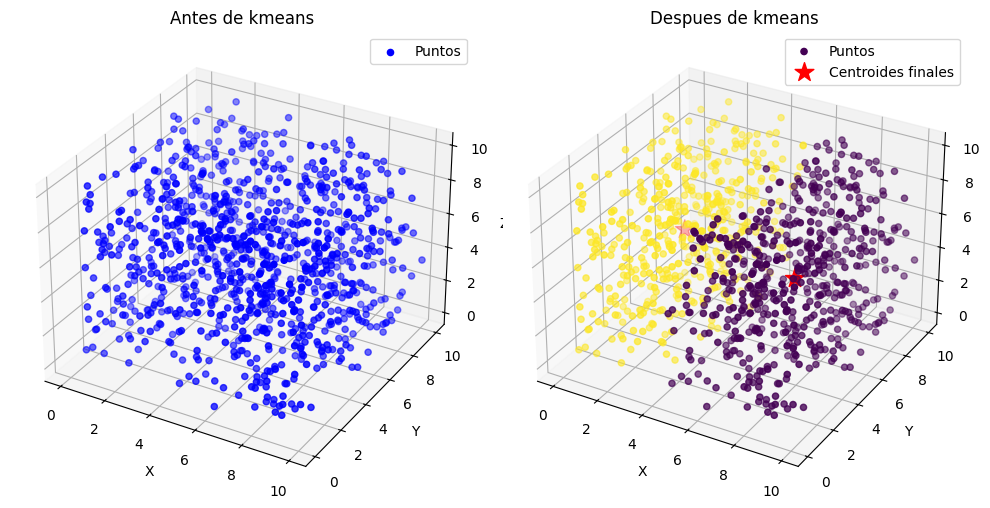

In [57]:
dibujar3D(points, kmeans.centroids, labels)

**DISTANCIA EUCLIDIANA K: 3**

In [60]:
points = np.random.rand(1000, 3) * 10
kmeans = KMeans(k=3, max_iter=1000)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

[2 1 0 0 2 1 1 1 2 1 2 1 0 2 0 0 2 0 0 1 2 0 2 0 1 2 0 1 2 1 0 2 0 1 0 0 2
 0 0 1 2 0 0 1 2 2 0 2 2 1 1 1 0 1 0 1 0 2 1 0 2 0 1 0 1 0 1 0 0 0 2 1 2 1
 1 2 2 2 2 1 0 1 0 1 2 1 1 1 2 2 1 0 1 0 2 2 1 0 2 1 2 1 2 1 1 1 2 0 2 2 1
 1 2 0 2 2 1 0 0 0 2 2 1 1 0 2 2 0 1 2 0 2 1 1 0 2 0 1 1 0 1 0 2 1 1 0 1 2
 2 2 2 0 1 2 2 2 2 0 2 0 1 0 1 0 1 0 2 1 1 1 0 2 0 2 0 1 0 0 1 1 1 1 0 0 1
 0 1 0 0 2 2 0 2 1 2 2 2 2 0 2 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 2 1 1 0
 0 1 0 2 2 2 2 0 0 0 0 2 2 0 2 1 1 2 0 1 2 0 0 2 2 2 1 1 0 0 2 1 2 0 0 1 2
 1 0 0 1 1 0 1 0 0 1 0 0 1 0 1 2 2 0 2 1 2 1 2 2 2 2 1 0 2 2 0 2 1 0 0 1 2
 2 0 1 2 1 1 1 0 2 0 0 0 0 0 0 0 1 1 2 0 0 0 0 1 0 1 1 0 1 2 2 0 1 1 0 2 2
 2 0 1 2 2 0 1 2 2 2 0 1 2 1 2 1 0 2 1 2 0 1 1 1 0 1 0 0 0 1 2 0 2 2 0 2 2
 2 2 1 1 2 2 0 1 1 1 1 0 0 2 0 1 2 1 0 1 2 1 0 0 0 0 2 2 1 1 0 1 2 2 1 2 0
 0 2 0 2 0 2 0 1 0 1 2 0 0 1 2 2 2 0 2 0 1 1 0 0 0 0 2 2 0 1 0 1 1 0 1 2 1
 0 1 0 1 0 0 1 2 0 0 2 0 0 1 1 2 2 2 0 1 1 1 1 0 2 0 2 0 1 0 2 1 0 0 1 1 1
 0 1 0 1 0 1 1 1 0 1 2 2 

In [61]:
points[20]

array([9.5042898 , 7.13500988, 1.14850301])

In [ ]:
dibujar3D(points, kmeans.centroids, labels)

**DISTANCIA EUCLIDIANA K: 5**

In [ ]:
points = np.random.rand(1000, 3) * 10
kmeans = KMeans(k=5, max_iter=1000)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

In [ ]:
points[20]

In [ ]:
dibujar3D(points, kmeans.centroids, labels)

**DISTANCIA EUCLIDIANA K:10 **

In [ ]:
points = np.random.rand(1000, 3) * 10
kmeans = KMeans(k=10, max_iter=1000)
labels = kmeans.run(points)
print(labels)
print(kmeans.centroids)

In [ ]:
points[20]

In [ ]:
dibujar3D(points, kmeans.centroids, labels)